First, the necessary libraries are imported.
The Dataframe is loaded and the first 10 rows are displayed, as well as the type of the columns.
In the next step, all duplicates in the file are removed.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging

logging.basicConfig(level=logging.INFO)

def load_data(file_name, arg2=None):
    try:
        data = pd.read_csv(file_name)
        logging.info(f"{file_name} has been loaded successfully.")
        return data
    except FileNotFoundError:
        print("File not found. Please check the file name and try again.")
        logging.warning("The file was not found.")
        return None

In [2]:
data = load_data('visit_data.csv')

# try:
#   data = pd.read_csv('visit_data.csv')
#   logging.info("visit_data.csv has been loaded successfully.")
# except FileNotFoundError:
#   print("File not found. Please check the file name and try again.")
#   logging.warning("The file was not found.")


print(data.head(10)) 

print(data.dtypes)

try: 
  if not data.empty:
    data = data.drop_duplicates() #drops all the duplicates
    logging.info("Duplicates have been dropped successfully.")
  else:
    print("The dataframe is empty.")
except:
  print("No duplicates found.")


INFO:root:visit_data.csv has been loaded successfully.
INFO:root:Duplicates have been dropped successfully.


            Patient     Visit_Reason        Date  Visit_Duration
0       David Moore            Cough  2022-01-05              17
1       Ivy Johnson           Injury  2022-10-20              51
2     Hannah Miller         Headache  2022-08-24              25
3        Ivy Wilson          Allergy  2022-08-25              26
4  Charlie Williams  Routine Checkup  2022-10-27              25
5     Charlie Davis           Injury  2022-05-20              39
6        Ivy Miller         Headache  2022-02-20              16
7         Ivy Smith           Injury  2022-11-07              57
8        Jack Moore            Cough  2022-07-14              22
9         Bob Davis            Fever  2022-01-20              30
Patient           object
Visit_Reason      object
Date              object
Visit_Duration     int64
dtype: object


Next, a list is created containing all the reasons for a visit to the doctor, as well as the number of visits per reason. 
The list is printed to ascertain that it is correctly filled.


In [3]:
#make a list with the visit reasons and count the occurences of said reasons
visit_reason_list = data.Visit_Reason.value_counts()
index = visit_reason_list.index
values = visit_reason_list.values
print(visit_reason_list)


Headache           1723
Allergy            1679
Routine Checkup    1673
Injury             1664
Cough              1635
Fever              1610
Name: Visit_Reason, dtype: int64


This code iterates on the elements in the list and creates a string containing the name, number of visits, mean, maximum and minimum for each reason.
This string is then appendet to a list.

In [4]:
calculated_list = []
for sickness, visits in visit_reason_list.items():
    mask = data.Visit_Reason == sickness 
    mean_sickness = data.loc[mask, 'Visit_Duration'].mean().round(decimals=1)
    max_sickness = data.loc[mask, 'Visit_Duration'].max()
    min_sickness = data.loc[mask, 'Visit_Duration'].min()
    row_sickness= ','.join([str(sickness),str(visits),str(mean_sickness),str(max_sickness),str(min_sickness)])
    calculated_list.append(row_sickness)

In the next step, the list is saved in a csv file named calculations.csv. 

In [5]:
try:
    with open('calculations.csv', 'w') as file: #saves the list of the calculated values to a csv file
        file.write("Visit_Reason,Visits,Mean_Duration,Max_Duration,Min_Duration\n")
        file.write("\n".join(calculated_list))
        logging.info("The data has been saved to calculations.csv successfully.")
except FileNotFoundError:
    print("File not found. Could not be saved to file. Please check the file name and try again.")
except Exception:
    if not calculated_list:
        print("The variable is empty.")

INFO:root:The data has been saved to calculations.csv successfully.


In this step, a bar plot is created using the seaborn library. The rows are grouped by reason of visit and a mean is calculated for each reason. 

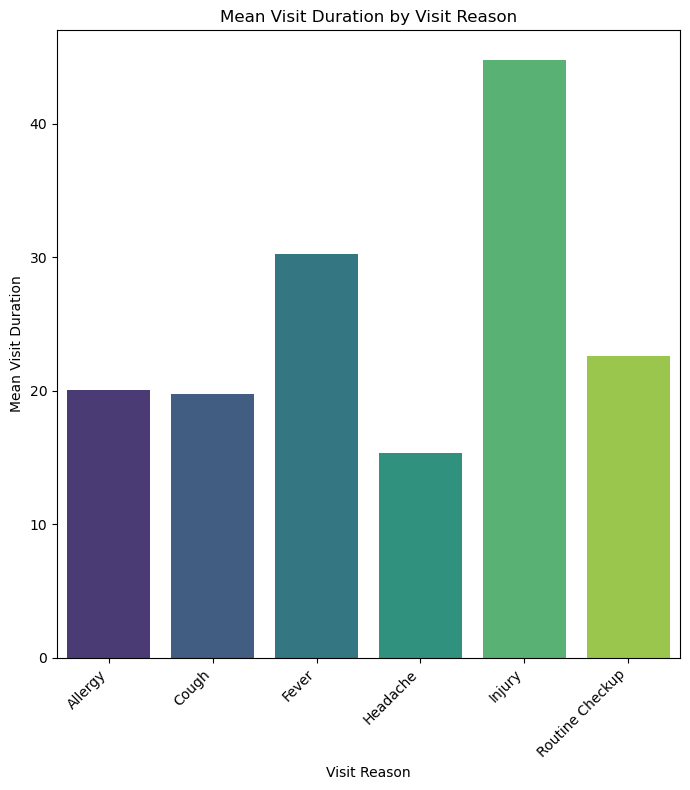

In [6]:
mean_durations = data.groupby('Visit_Reason')['Visit_Duration'].mean().reset_index()

# Set up the plot
plt.figure(figsize=(7, 8))
sns.barplot(x='Visit_Reason', y='Visit_Duration', data=mean_durations, palette='viridis')

# Adding labels and title
plt.xlabel('Visit Reason')
plt.ylabel('Mean Visit Duration')
plt.title('Mean Visit Duration by Visit Reason')

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In the next step, a box plot is created, showing the range, median as well as 75% percentile of minutes needed per visit for each reason.

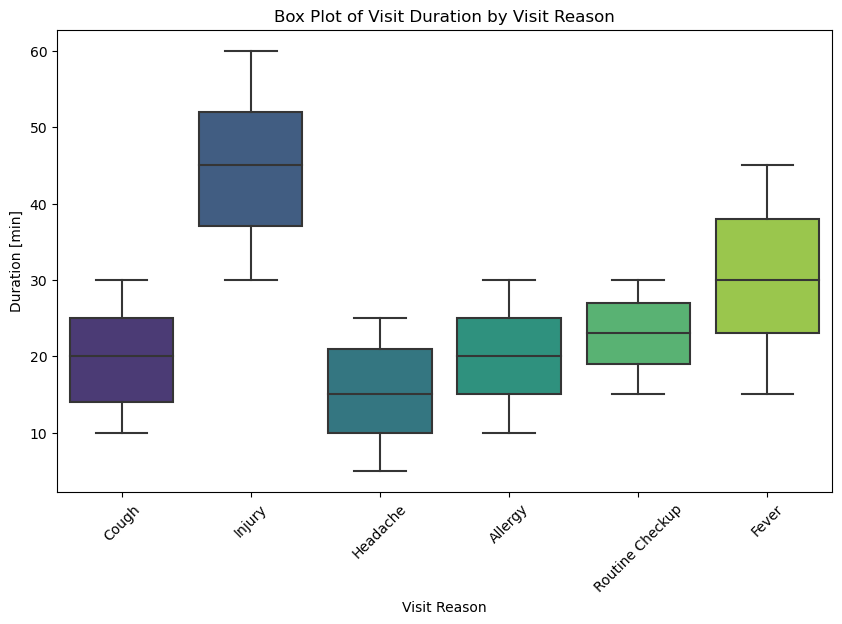

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Visit_Reason', y='Visit_Duration', palette="viridis")
plt.title('Box Plot of Visit Duration by Visit Reason')
plt.xlabel('Visit Reason')
plt.ylabel('Duration [min]')
plt.xticks(rotation=45)
plt.show()


In the next graph, the data from the calculations.csv file is displayed, comparing the minimum, maximum and mean duration of each reason of visit. To achieve this, the data from the file is saved in the calculated_data variable.

INFO:root:calculations.csv has been loaded successfully.


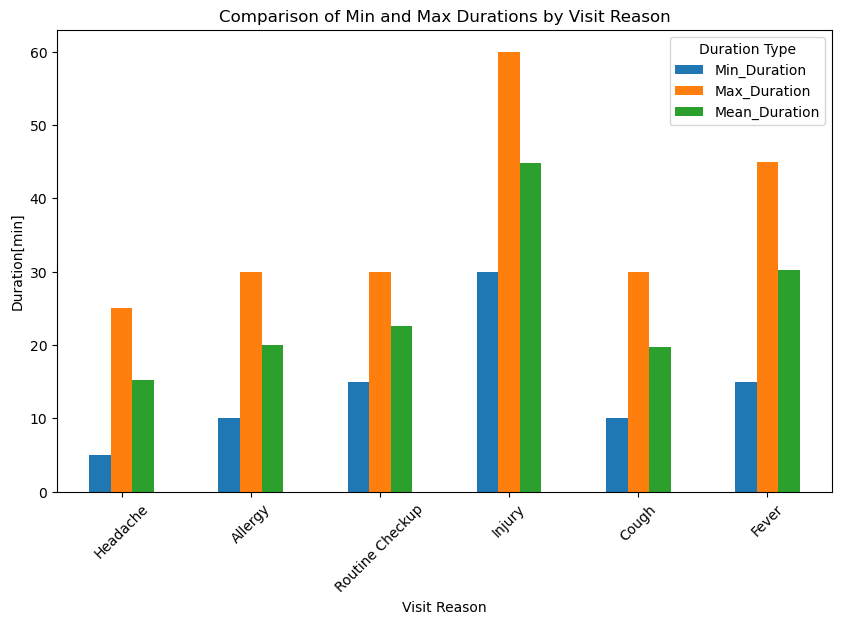

In [8]:
calculated_data = load_data('calculations.csv')
      
calculated_data.set_index('Visit_Reason', inplace=True)
fig, ax = plt.subplots(figsize=(10, 6))

calculated_data[['Min_Duration', 'Max_Duration',"Mean_Duration"]].plot(kind='bar', ax=ax)
plt.title('Comparison of Min and Max Durations by Visit Reason')
plt.xlabel('Visit Reason')
plt.ylabel('Duration[min]')
plt.xticks(rotation=45) 
plt.legend(title='Duration Type')
plt.show()

There are patients who have visited the doctor more than once. First, the amount of times a patient visited the doctor is counted and the top 10 visitors are printed.

The Data is split and stacked, then grouped by the patient and reason. Then the occurances of a 
Unfortunately, all patients have been to the doctor for all 6 of the visit reasons studied :P.

In [9]:
repeated_visits = data.Patient.value_counts()
print(repeated_visits.head(10))

data_by_visit_reason = (data['Visit_Reason'].str.split(', ')
                    .groupby(data['Patient'])
                    .agg(lambda x: ', '.join(set(y for z in x for y in z)))
                    .reset_index()) 

try:
  data_by_visit_reason.to_csv('patients_visit_reasons.csv', mode="w")
except FileNotFoundError:
  print("File not found. Please check the file name and try again.")
  logging.warning("The file was not found.")


Alice Smith        129
Jack Miller        121
David Smith        119
Bob Taylor         119
George Williams    115
Jack Taylor        115
Hannah Moore       114
Emma Johnson       113
Charlie Smith      113
Charlie Taylor     112
Name: Patient, dtype: int64


In the next step, it would be interesting to know which patient visited the doctor how often for what reason. To achieve this, the original dataframe is grouped by both the "Patients" and the "Visit Reason" column, counting the number of occurences of the combination of a name with the same reason. After sorting by the most visits due to the same reason, the 10 Patients who visited for the same reason most often are printed and the dataframe is saved to a csv file. 

In [10]:
# Count the occurrences of each visit reason for each patient
visit_reason_counts = data.groupby(['Patient', 'Visit_Reason']).size().reset_index(name='Count')
visit_reason_counts = visit_reason_counts.sort_values("Count", ascending=False)
print(visit_reason_counts.head(10))
try: 
  visit_reason_counts.to_csv('visit_reason_counts.csv', mode="w")
except FileNotFoundError:
  print("File not found. Please check the file name and try again.")
  logging.warning("The file was not found.")
except Exception:
  if not calculated_list:
      print("The variable is empty.")


            Patient     Visit_Reason  Count
501       Ivy Jones         Headache     30
478   Hannah Wilson           Injury     29
228  David Williams          Allergy     28
41      Alice Smith  Routine Checkup     28
527      Ivy Taylor  Routine Checkup     28
452    Hannah Moore            Fever     27
567     Jack Miller         Headache     27
390    George Moore          Allergy     27
29     Alice Miller  Routine Checkup     27
186     David Davis          Allergy     27


In the next step, we focus on the patients who visited for a routine checkup. It is remarkable that some patients visited very often for routine checkups. To find these patients and the number of times they visited for that reason, a mask is created. The top and bottom 10 patients are printed.
As the patients insurance, I would check if that many routine checkups are really necessary. :P

In [11]:
maskRoutineCheckup = visit_reason_counts.Visit_Reason == "Routine Checkup"
routine_checkup = visit_reason_counts[maskRoutineCheckup].set_index('Patient')
print(routine_checkup.head(10))
print(routine_checkup.tail(10))



                   Visit_Reason  Count
Patient                               
Alice Smith     Routine Checkup     28
Ivy Taylor      Routine Checkup     28
Alice Miller    Routine Checkup     27
Fiona Brown     Routine Checkup     25
Charlie Davis   Routine Checkup     25
Jack Davis      Routine Checkup     24
Emma Wilson     Routine Checkup     23
Ivy Brown       Routine Checkup     23
Hannah Johnson  Routine Checkup     22
Ivy Williams    Routine Checkup     22
                  Visit_Reason  Count
Patient                              
Alice Johnson  Routine Checkup     12
Hannah Moore   Routine Checkup     12
Hannah Wilson  Routine Checkup     11
Ivy Johnson    Routine Checkup     11
Alice Brown    Routine Checkup     11
David Moore    Routine Checkup     10
David Taylor   Routine Checkup     10
Bob Wilson     Routine Checkup      9
David Wilson   Routine Checkup      7
Fiona Wilson   Routine Checkup      7
